# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 

In [1]:
#setup
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
# model setup
batch_size = 128
num_classes = 10
epochs = 20

In [4]:
#build model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

C:\Users\rober\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
#add noise
np.random.seed(15)
noise_feat = np.linspace(.1, 1.0, 10)
np.random.shuffle(noise_feat)
feat_img = {i: noise_feat[i] for i in range(10)}
x_train_noise = []
x_test_noise = []
#noise for train
for i in range(len(x_train)):
    class_lab = y_train[i]
    noise_scale = feat_img[class_lab]
    noise = np.random.normal(loc=0.0, scale=noise_scale, size=x_train[i].shape)
    img = np.clip(x_train[i] + noise, 0., 1.)
    x_train_noise.append(img)
#noise for test
for i in range(len(x_test)):
    class_lab = y_test[i]
    noise_scale = feat_img[class_lab]
    noise = np.random.normal(loc=0.0, scale=noise_scale, size=x_test[i].shape)
    img = np.clip(x_test[i] + noise, 0., 1.)
    x_test_noise.append(img)

x_train_noise = np.array(x_train_noise)
x_test_noise = np.array(x_test_noise)

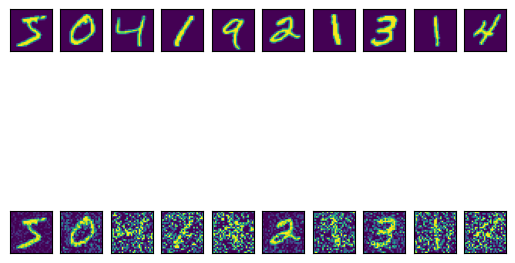

In [6]:
#compare plots with noise
plt.figure()
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(x_train_noise[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#### Train Data (no noise)

In [7]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.6856 - loss: 0.9350 - val_accuracy: 0.8485 - val_loss: 0.5339
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.7605 - loss: 0.7331 - val_accuracy: 0.8628 - val_loss: 0.5015
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7806 - loss: 0.6895 - val_accuracy: 0.8697 - val_loss: 0.4802
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.7919 - loss: 0.6595 - val_accuracy: 0.8739 - val_loss: 0.4628
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.7937 - loss: 0.6497 - val_accuracy: 0.8774 - val_loss: 0.4472
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8011 - loss: 0.6303 - val_accuracy: 0.8806 - val_loss: 0.4335
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8056 - loss: 0.6195 - val_accuracy: 0.8844 - val_loss: 0.4219
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8110 - loss: 0.6032 - 

#### Train Data (w/ noise)

In [13]:
history2 = model.fit(x_train_noise, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noise, y_test))
score2 = model.evaluate(x_test_noise, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.7086 - loss: 0.8805 - val_accuracy: 0.8553 - val_loss: 0.5371
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.7408 - loss: 0.7812 - val_accuracy: 0.8604 - val_loss: 0.5065
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.7486 - loss: 0.7524 - val_accuracy: 0.8636 - val_loss: 0.4906
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.7550 - loss: 0.7344 - val_accuracy: 0.8661 - val_loss: 0.4807
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7563 - loss: 0.7295 - val_accuracy: 0.8682 - val_loss: 0.4679
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7606 - loss: 0.7153 - val_accuracy: 0.8716 - val_loss: 0.4597
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.7671 - loss: 0.6984 - val_accuracy: 0.8723 - val_loss: 0.4517
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.7663 - loss: 0.6945 - 

#### Comparison

In [14]:
print('Test loss:', score[0], 'Test loss with Noise:', score2[0])
print('Test accuracy:', score[1], 'Test accuracy with Noise:', score2[1])

Test loss: 0.33282503485679626 Test loss with Noise: 0.3820398151874542
Test accuracy: 0.906499981880188 Test accuracy with Noise: 0.8865000009536743


## 3. Vary the amount of noise by changing the scale parameter in np.random.normal by a factor. Use .1, .5, 1.0, 2.0, 4.0 for the scale and keep track of the accuracy for training and validation and plot these results

In [15]:
##Build Models

def noise_test(df, scale):
    noise = np.random.normal(loc=0.0, scale=scale, size=df.shape)
    df_noise = df + noise
    return np.clip(df_noise, 0., 1.)

def conv():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return model

def eval(x_train, y_train, x_test, y_test, scale):
    x_train_noise = noise_test(x_train, scale)
    t_test_noise = noise_test(x_test, scale)

    model = conv()
    history = model.fit(x_train_noise, y_train,
                        epochs = 20,
                        batch_size = 128,
                        validation_data=(x_test_noise, y_test),
                        verbose = 0)
    return history

#Citation: OpenAI (2024). ChatGPT. Retrieved from: openai.chatgpt.com

In [16]:
#test
noise_scale = [0.1, 0.5, 1.0, 2.0, 4.0]
histories = {}

for scale in noise_scale:
    print(f'Training Noise Scale: {scale}')
    histories[scale] = eval(x_train, y_train, x_test, y_test, scale)

Training Noise Scale: 0.1
Training Noise Scale: 0.5
Training Noise Scale: 1.0
Training Noise Scale: 2.0
Training Noise Scale: 4.0


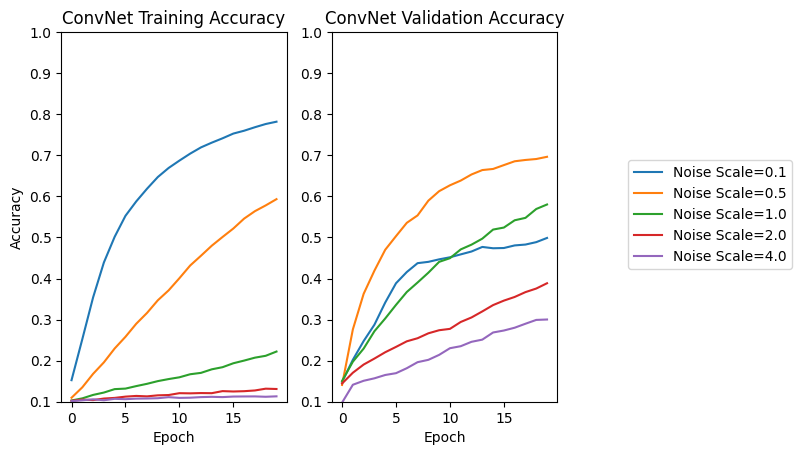

In [18]:
#plot for training and validation
fig, axs = plt.subplots(1, 2)

for scale, history in histories.items():
    axs[0].plot(history.history['accuracy'], label=f'Noise Scale={scale}')

axs[0].set_title('ConvNet Training Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')

for scale, history in histories.items():
    axs[1].plot(history.history['val_accuracy'])

axs[1].set_title('ConvNet Validation Accuracy')
axs[1].set_xlabel('Epoch')

axs[0].set_ylim(0.1, 1.0)
axs[1].set_ylim(0.1, 1.0)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### 4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

##### Previous weeks plots below

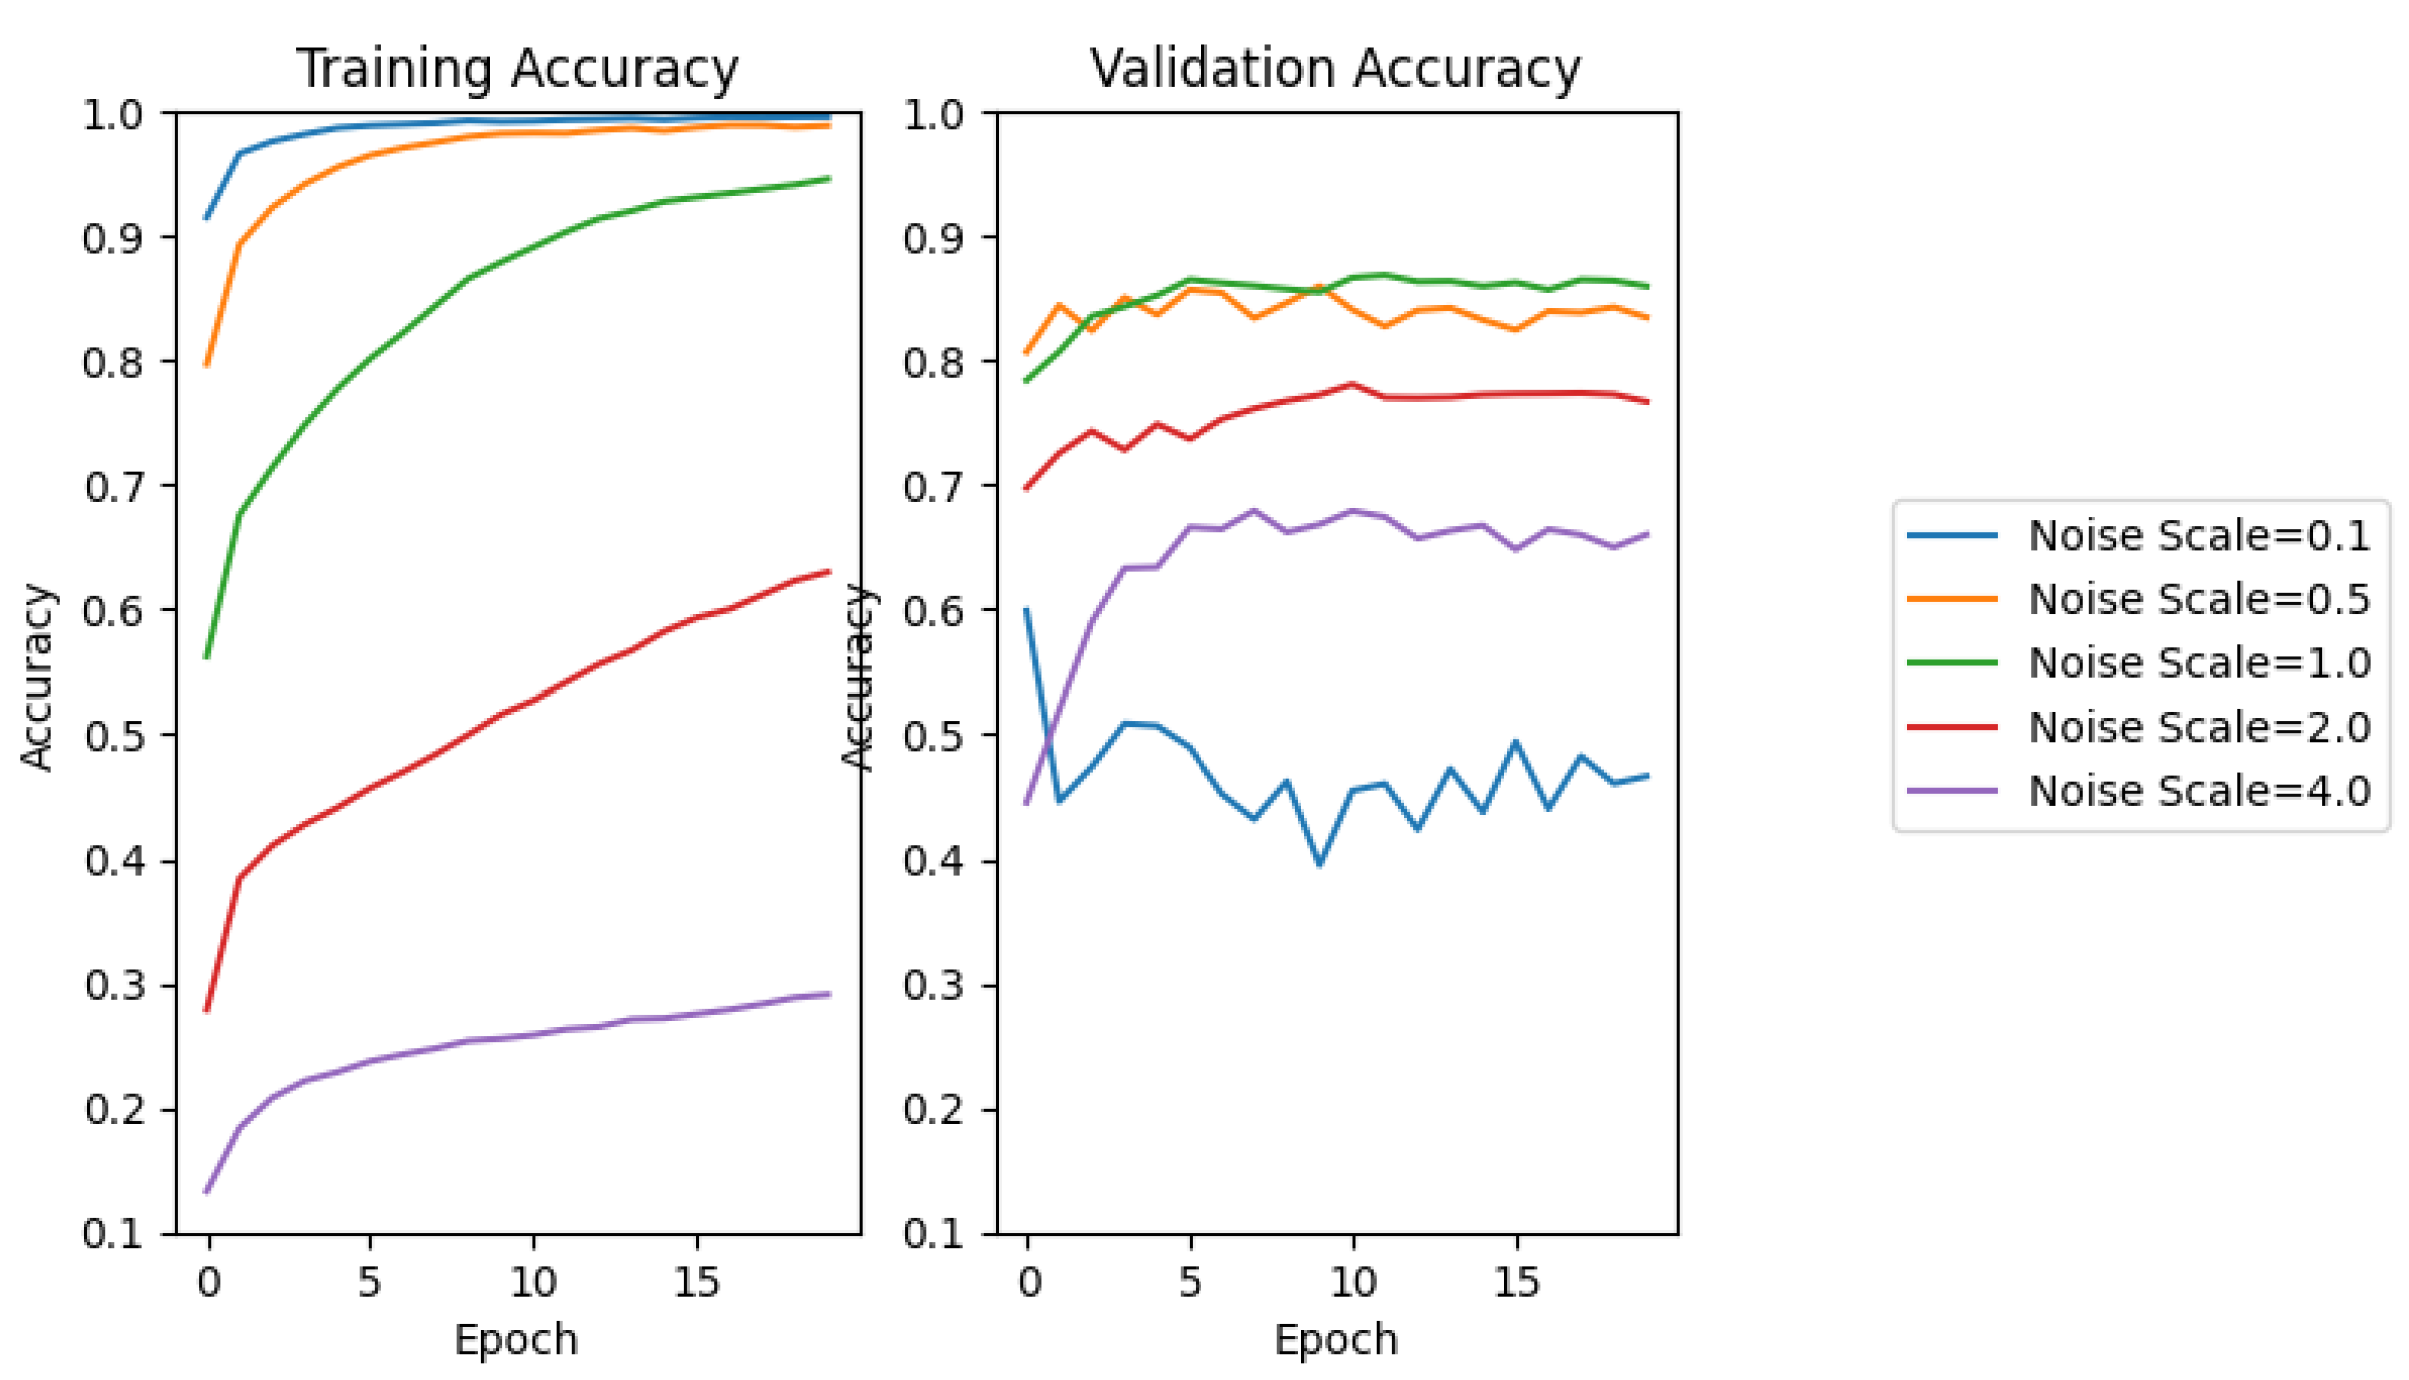

Comparing the ConvNet to the Multilayer Perceptron, we can see visually that the perceptron model has higher training accuracy and validation accuracy at all levels of noise scales, through 20 epochs. However, we can see at Noise Scale 0.1 and 0.5, the ConvNet model is continuing to increase steadily toward 1.0 accuracy. We could expect that across a greater number of epochs, the convnet model would match the training accuracy of the perceptron model. As we look at the shape of the training curves, we also see much steeper learning for the multilayer model, especially at higher noise levels. The convnet models have both low accuracy and flat slopes at the 2.0 and 4.0 noise scales. Looking at validation accuracy, we see the perceptron models essentially remaining level through 20 epochs, but the convnet model continues to increase in validation accuracy, even at 20 epochs. We might expect it to continue to increase at greater epochs, although it might also level out (similar to the perceptron model) when the overall accuracy reaches its highest level. 

One thing to note (also mentioned in the lectures) is the length of time it takes to train a convnet model is substantially longer than that of the perceptron model. That said, adjusting the batch size (smaller) and epochs (larger) would likely result in increased accuracy for the convnet model. With more computing power, adjustments could certainly be made to the convnet model to increase its accuracy. 